### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Descriptive statistics

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for null values

In [6]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### Filling null values in Age column using mean

In [7]:
age_mean=df.Age.mean()
age_mean

29.69911764705882

In [8]:
df.Age.fillna(age_mean,inplace=True)

In [9]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### Dropping the null values

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

##### Dropping unwanted columns

In [12]:
df.drop(columns=['PassengerId','Ticket'],inplace=True)

In [13]:
df.shape

(202, 10)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
1,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
2,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
3,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S


In [16]:
df.Survived.value_counts()

1    134
0     68
Name: Survived, dtype: int64

In [17]:
df.Pclass.value_counts()

1    174
2     16
3     12
Name: Pclass, dtype: int64

In [18]:
df.SibSp.value_counts()

0    124
1     69
2      6
3      3
Name: SibSp, dtype: int64

In [19]:
df.Embarked.value_counts()

S    129
C     69
Q      4
Name: Embarked, dtype: int64

In [20]:
df.Parch.value_counts()

0    139
1     39
2     23
4      1
Name: Parch, dtype: int64

In [21]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

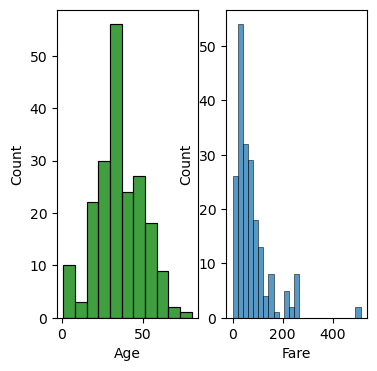

In [22]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Age',color='green')

plt.subplot(1,2,2)
sns.histplot(data=df,x='Fare')

plt.show()


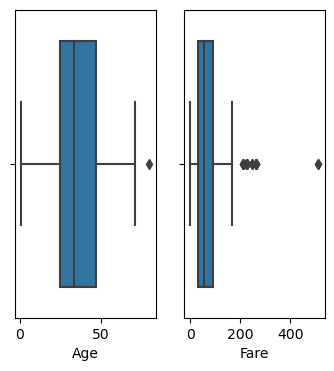

In [23]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Age')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='Fare')

plt.show()

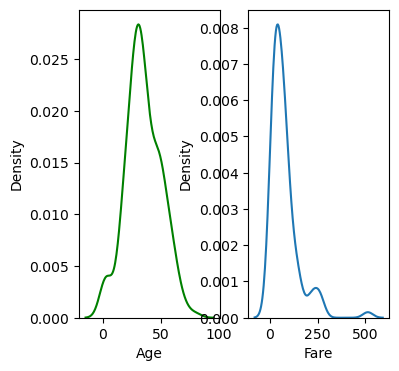

In [24]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='Age',color='green')

plt.subplot(1,2,2)
sns.kdeplot(data=df,x='Fare')

plt.show()

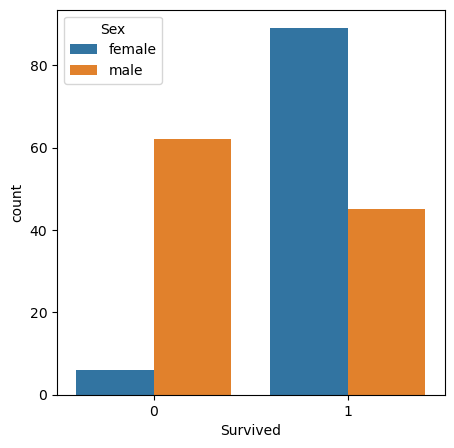

In [25]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x=df['Survived'], hue='Sex')
plt.show()

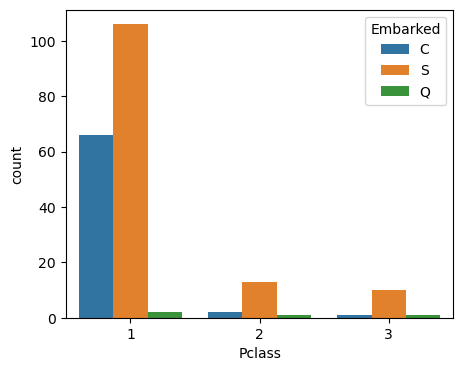

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Pclass', hue='Embarked')
plt.show()

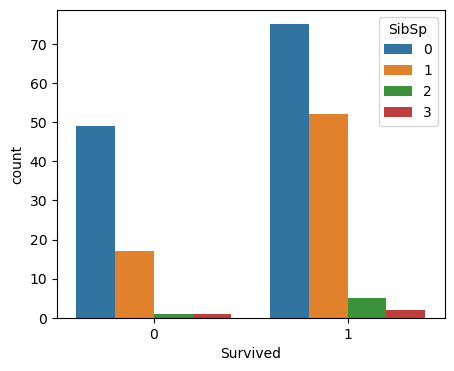

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x=df['Survived'], hue='SibSp')
plt.show()

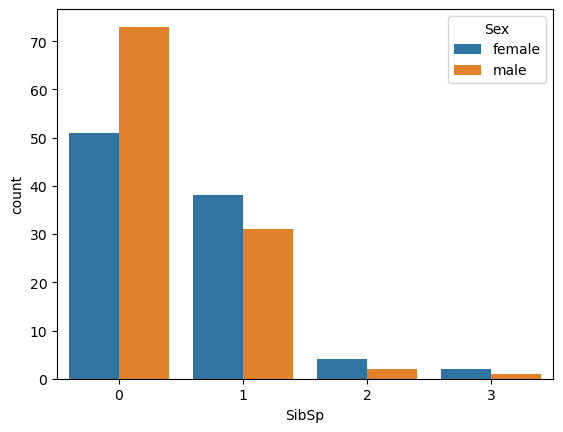

In [28]:
sns.countplot(data=df, x='SibSp', hue='Sex')
plt.show()

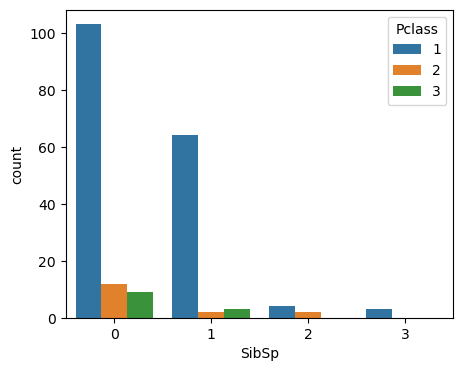

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='SibSp', hue='Pclass')
plt.show()

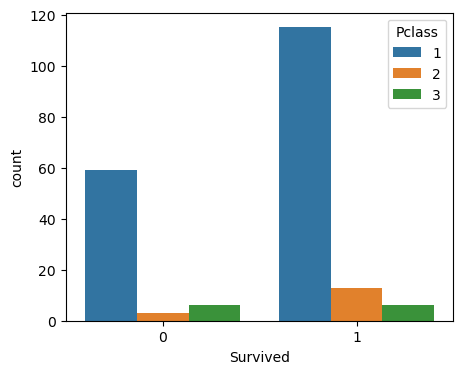

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.show()

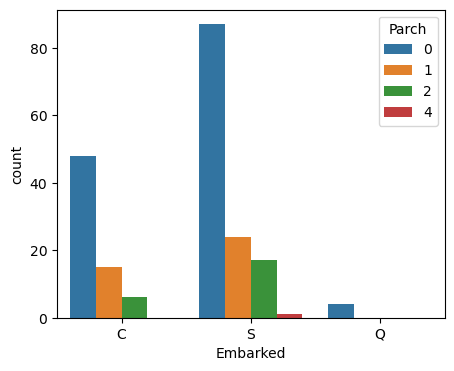

In [31]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Embarked', hue='Parch')
plt.show()

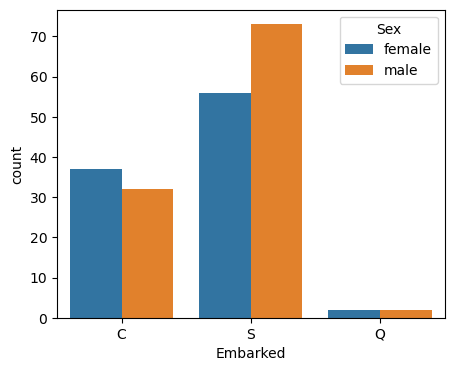

In [32]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Embarked', hue='Sex')
plt.show()

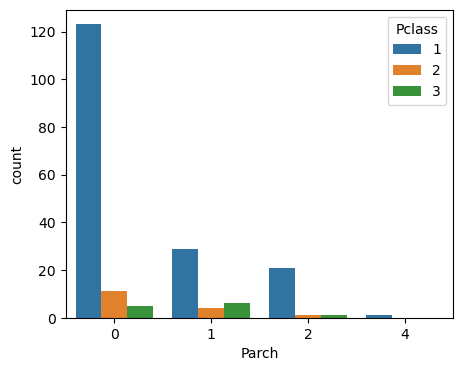

In [33]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Parch', hue='Pclass')
plt.show()

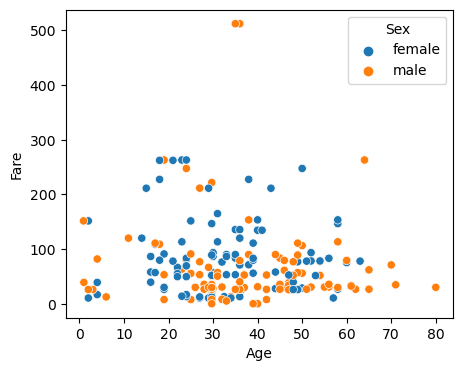

In [34]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Age',y='Fare',hue='Sex')
plt.show()

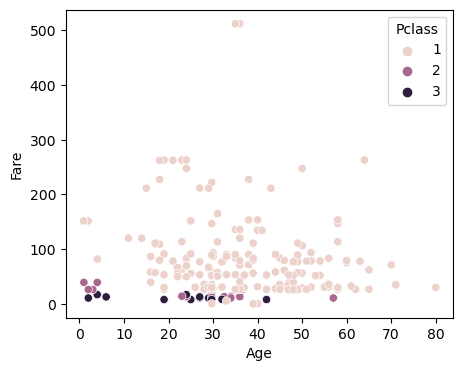

In [35]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Age',y='Fare',hue='Pclass')
plt.show()

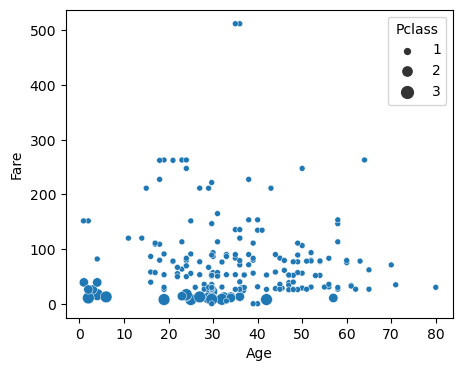

In [36]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df,x='Age',y='Fare',size='Pclass')
plt.show()

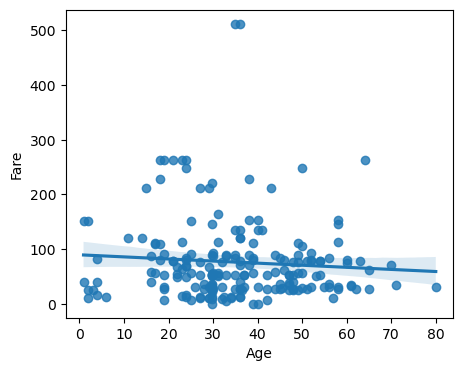

In [37]:
plt.figure(figsize=(5,4))
sns.regplot(x='Age',y='Fare',data=df);
plt.show()

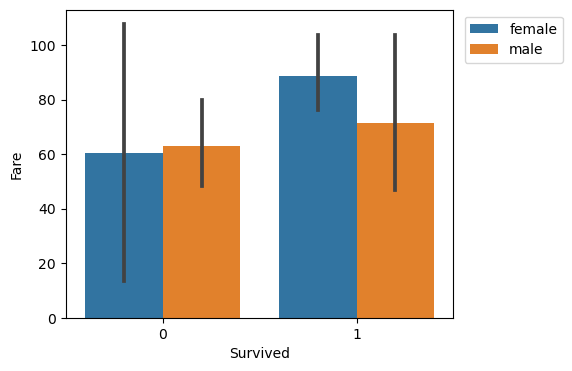

In [38]:
plt.figure(figsize=(5,4))
plt.xticks(rotation=0)
sns.barplot(data=df,x='Survived',y='Fare',hue='Sex')
plt.legend(bbox_to_anchor=[1.3,1])
plt.show()

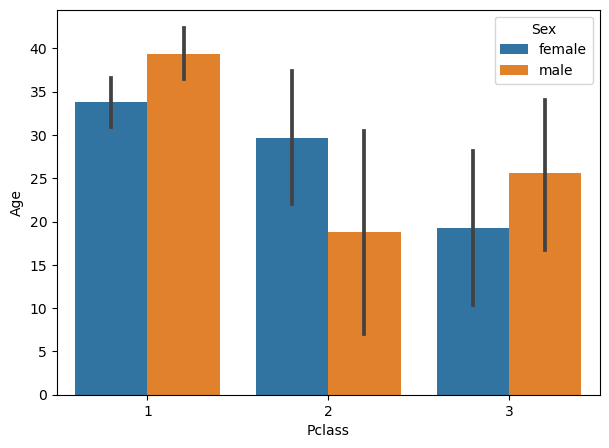

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Pclass',y='Age',hue='Sex')
plt.show()

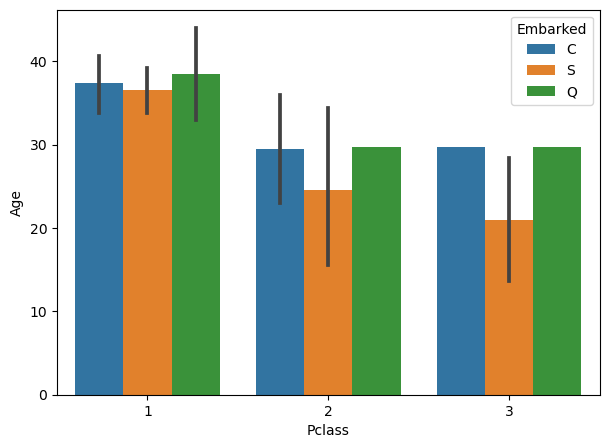

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='Pclass',y='Age',hue='Embarked')
plt.show()

In [41]:
df.Survived.value_counts()

1    134
0     68
Name: Survived, dtype: int64

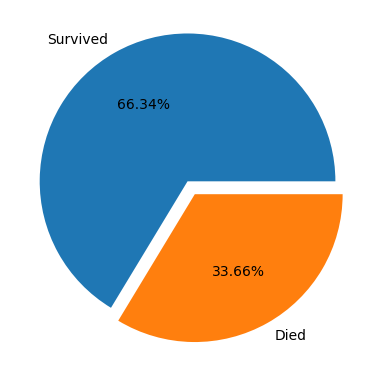

In [42]:
plt.pie(data=df,x=df.Survived.value_counts(),explode=[0.1,0],labels=['Survived','Died'],autopct='%1.2f%%')
plt.show()

In [43]:
df.Pclass.value_counts()

1    174
2     16
3     12
Name: Pclass, dtype: int64

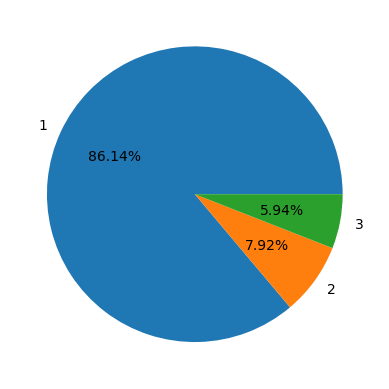

In [44]:
plt.pie(data=df,x=df.Pclass.value_counts(),labels=['1','2','3'],autopct='%1.2f%%')
plt.show()

In [45]:
sibsp_fare=df.groupby(['SibSp'])['Fare'].sum()

In [46]:
sibsp_fare=sibsp_fare.reset_index()
sibsp_fare

,SibSp,Fare
0,0,8081.4416
1,1,5758.1960
2,2,744.2292
3,3,789.0000


In [47]:
sibsp_fare.SibSp.value_counts().index

Int64Index([0, 1, 2, 3], dtype='int64')

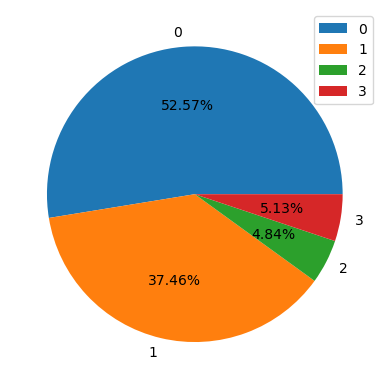

In [48]:
plt.pie(data=sibsp_fare,x=sibsp_fare.Fare,labels=[0, 1, 2, 3],autopct='%1.2f%%')
plt.legend()
plt.show()

In [49]:
embarked_fare=df.groupby(['Embarked'])['Fare'].sum()
embarked_fare=embarked_fare.reset_index()

In [50]:
embarked_fare.Embarked.value_counts().index

Index(['C', 'Q', 'S'], dtype='object')

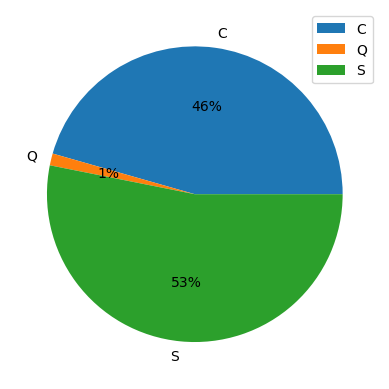

In [51]:
plt.pie(data=embarked_fare,x='Fare',labels=['C', 'Q', 'S'],autopct='%1.0f%%')
plt.legend()
plt.show()

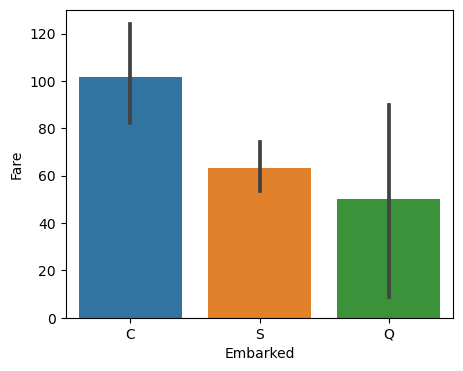

In [52]:
plt.figure(figsize=(5,4))
sns.barplot(data=df,x='Embarked',y='Fare')
plt.show()